In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I read the dataset with the pandas library.
data = pd.read_csv("gender_classification_v7.csv")

In [3]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [4]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
# Data of values(Max, min, std...)
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Data Correlation: Relationship between columns
data.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


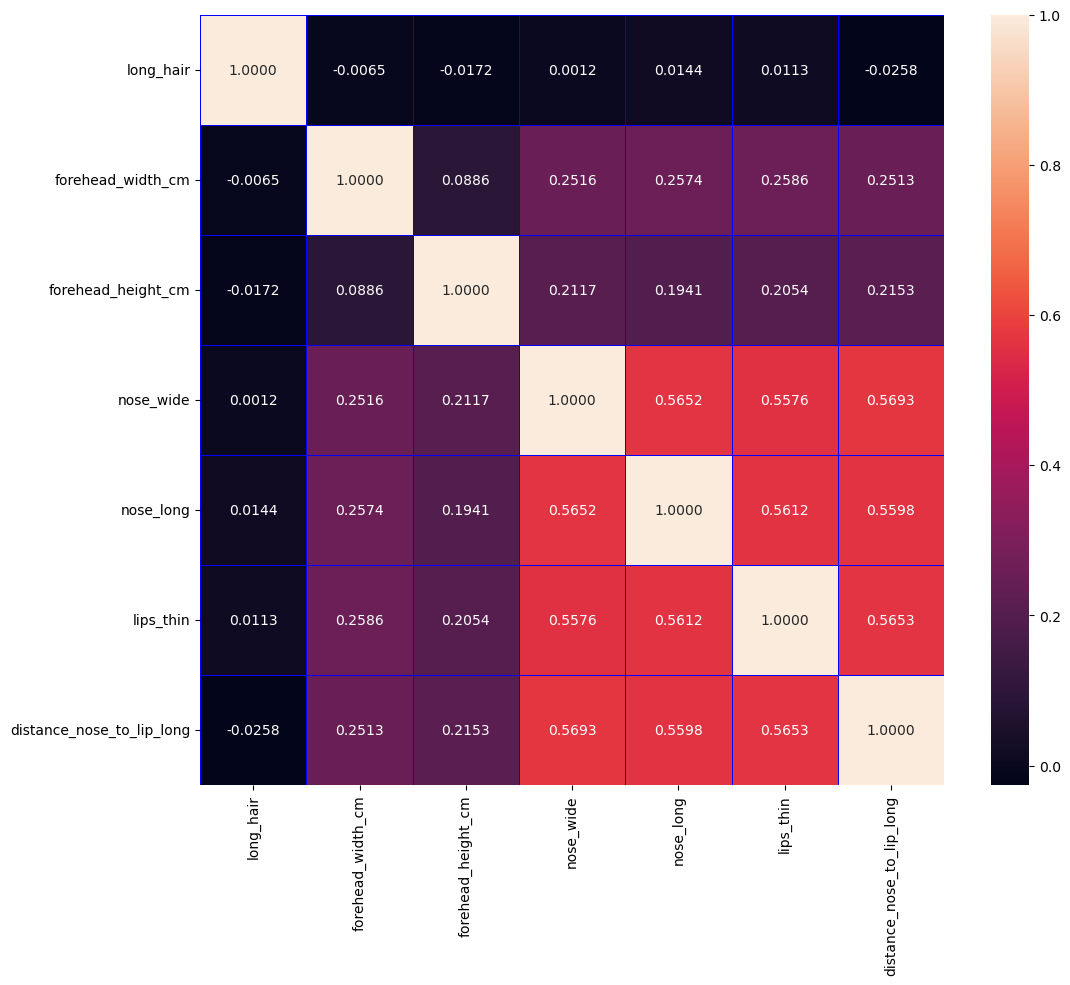

In [8]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, linecolor = "blue", fmt = ".4f", ax = ax)
plt.show()

In the code above, Most columns got zero and one of their values. Only forehead_width_cm and forehead_height_cm are different other columns.When I look at the graph I don't see a relationship between forehead_width_cm and forehead_height_cm because It seems very complex.

In [10]:
# Columns of data
data.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

Data Visualization 
In this chapter, I made a visualization of data.

Female    2501
Male      2500
Name: gender, dtype: int64

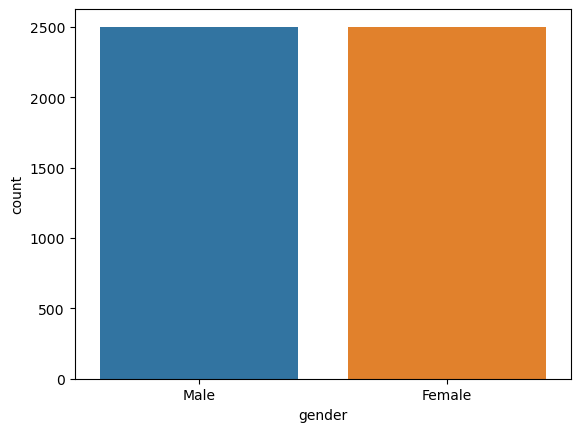

In [12]:
# The number of gender in the dataset and its graphic.
sns.countplot(x = "gender", data = data)
data.loc[:,"gender"].value_counts()

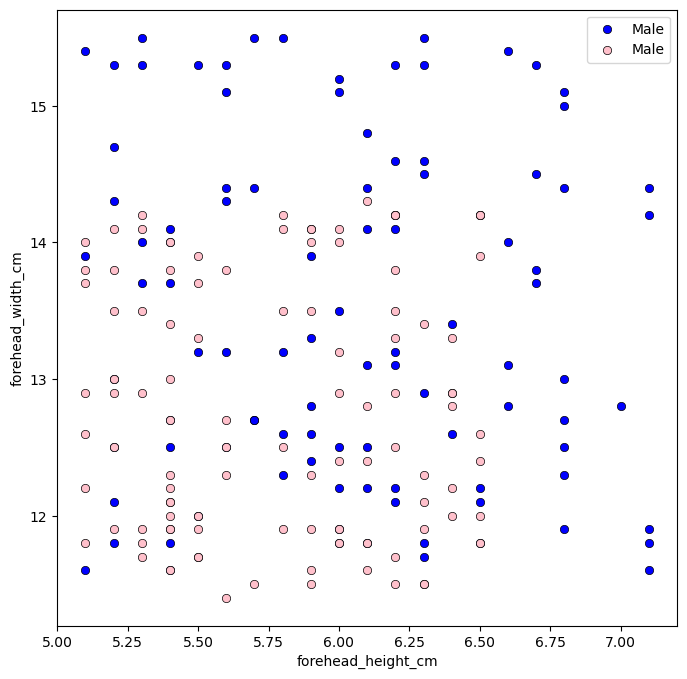

In [13]:
Male = data[data.gender == "Male"].iloc[:100,:]
Female = data[data.gender == "Female"].iloc[:100,:]

plt.figure(figsize = (8,8))
plt.scatter(Male.forehead_height_cm, Male.forehead_width_cm, color = "blue", label = "Male", linewidths = 0.5, edgecolor = "black")
plt.scatter(Female.forehead_height_cm, Female.forehead_width_cm, color = "pink", label = "Male", linewidths = 0.5, edgecolor = "black")
plt.xlabel("forehead_height_cm")
plt.ylabel("forehead_width_cm")
plt.legend()
plt.show()

In the code above, I took to only the top hundred values. Because When I took to all values It seemed very complex.

### Data preparing for Naive Bayes Classification 
I prepare x_data and y_data. I read dataset again beacause I will change in dataset. The class column is a string type and I want to that be an integer. In the block of code, I will specify.

In [15]:
# Read dataset
data_nbc = pd.read_csv("gender_classification_v7.csv")
data_nbc

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [16]:
# Change gender type
# Male : 1
# Female : 0
data_nbc.gender = [1 if i == "Male" else 0 for i in data_nbc.gender]

In [17]:
data_nbc


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [18]:
# x_data
x_data = data_nbc.drop(["gender"],axis = 1)

# y_data
y_data = data_nbc.gender.values

In [19]:
x_data


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [20]:
y_data


array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [21]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=1)

### Traning Model 
In this chapter, I applied types of Naive Bayes Classifiers.


### Gaussian Naive Bayes
 

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

print("print Train for accuracy of NBC algo: ", gnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", gnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.97
print Test for accuracy of NBC algo:  0.9713524317121919


### Bernoulli Naive Bayes

In [23]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(x_train, y_train)

print("print Train for accuracy of NBC algo: ", bnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", bnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.9585714285714285
print Test for accuracy of NBC algo:  0.9640239840106596


### Complement Naive Bayes¶


In [24]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()

cnb.fit(x_train, y_train)

print("print Train for accuracy of NBC algo: ", cnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", cnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.9565714285714285
print Test for accuracy of NBC algo:  0.960692871419054
